In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import zipfile

In [3]:
headers = ["p1", "p36", "p37", "p2a", "weekday(p2a)", "p2b", "p6", "p7", "p8", "p9", "p10", "p11", "p12", "p13a",
                "p13b", "p13c", "p14", "p15", "p16", "p17", "p18", "p19", "p20", "p21", "p22", "p23", "p24", "p27", "p28",
                "p34", "p35", "p39", "p44", "p45a", "p47", "p48a", "p49", "p50a", "p50b", "p51", "p52", "p53", "p55a",
                "p57", "p58", "a", "b", "d", "e", "f", "g", "h", "i", "j", "k", "l", "n", "o", "p", "q", "r", "s", "t", "p5a"]

def load_data(filename: str) -> pd.DataFrame:
    global headers
    
    # def get_dataframe(filename: str, verbose: bool = False) -> pd.DataFrame:
    regions = {
        "PHA": "00",
        "STC": "01",
        "JHC": "02",
        "PLK": "03",
        "ULK": "04",
        "HKK": "05",
        "JHM": "06",
        "MSK": "07",
        "OLK": "14",
        "ZLK": "15",
        "VYS": "16",
        "PAK": "17",
        "LBK": "18",
        "KVK": "19",
    }

    dataframe = pd.DataFrame()
    with zipfile.ZipFile(filename, mode='r') as outer_zip:
        for zip_file in outer_zip.namelist():
            with outer_zip.open(zip_file, mode='r') as inner_zip:
                with zipfile.ZipFile(inner_zip, mode='r') as inner:
                    for csv_file_name in regions.values():
                        with inner.open(f"{csv_file_name}.csv", mode='r') as csv:
                            df = pd.read_csv(csv, encoding="cp1250", delimiter=';', names=headers, low_memory=False)
                            df["region"] = [index for index, value in regions.items() if value == csv_file_name][0]
                            dataframe = pd.concat([df, dataframe])
    
    return dataframe

dataframe = load_data("data/data.zip")
                        

In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 707027 entries, 0 to 22875
Data columns (total 65 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   p1            707027 non-null  int64  
 1   p36           707027 non-null  int64  
 2   p37           329366 non-null  float64
 3   p2a           707027 non-null  object 
 4   weekday(p2a)  707027 non-null  int64  
 5   p2b           707027 non-null  int64  
 6   p6            707027 non-null  int64  
 7   p7            707027 non-null  int64  
 8   p8            707027 non-null  int64  
 9   p9            707027 non-null  int64  
 10  p10           707027 non-null  int64  
 11  p11           707027 non-null  int64  
 12  p12           707027 non-null  int64  
 13  p13a          707027 non-null  int64  
 14  p13b          707027 non-null  int64  
 15  p13c          707027 non-null  int64  
 16  p14           707027 non-null  int64  
 17  p15           707025 non-null  float64
 18  p16       

In [5]:
dataframe

,p1,p36,p37,p2a,weekday(p2a),p2b,p6,p7,p8,p9,...,l,n,o,p,q,r,s,t,p5a,region
0,31017220679,1,21.0,2022-11-24,4,1954,3,0,6,2,...,21,NaN,NaN,NaN,NaN,554855.0,NaN,NaN,2,KVK
1,31017220700,1,21.0,2022-11-24,4,1954,1,2,0,2,...,21,NaN,NaN,NaN,NaN,560901.0,NaN,NaN,2,KVK
2,190206220001,3,21413.0,2022-01-01,6,530,9,0,0,1,...,21413,2252406.0,NaN,Opačnýkesměruúseku,Pomalý,554626.0,NaN,GN_V0.1UIR-ADR_410,2,KVK
3,190206220002,6,NaN,2022-01-01,6,2560,2,0,0,2,...,NaN,216198.0,NaN,Opačnýkesměruúseku,Pomalý,554481.0,139521.0,GN_V0.1UIR-ADR_410,1,KVK
4,190206220003,6,NaN,2022-01-01,6,2560,2,0,0,2,...,NaN,1458751.0,NaN,Souhlasnýsesměremúseku,Pomalý,554481.0,139513.0,GN_V0.1UIR-ADR_410,1,KVK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22871,10043163235,0,11.0,2016-11-10,4,1210,3,0,3,2,...,D11,712075.0,NaN,Opačnýkesměruúseku,Pomalý,554782.0,507890.0,GN_V0.1UIR-ADR_410,1,PHA
22872,10043163239,0,11.0,2016-11-21,1,2240,5,0,0,2,...,D11,1278207.0,NaN,Souhlasnýsesměremúseku,Rychlý,554782.0,507890.0,GN_V0.1UIR-ADR_410,1,PHA
22873,10043163256,0,11.0,2016-12-19,1,1153,3,0,9,2,...,NaN,2566581.0,NaN,Opačnýkesměruúseku,Pomalý,554782.0,NaN,GN_V0.1UIR-ADR_410,1,PHA
22874,10043163259,0,11.0,2016-12-25,0,2230,5,0,0,2,...,D11,1481958.0,NaN,Souhlasnýsesměremúseku,Pomalý,554782.0,507890.0,GN_V0.1UIR-ADR_410,1,PHA


In [6]:
def calculate_df_size_bytes(df: pd.DataFrame) -> int:
    return df.memory_usage(deep=True).sum()

In [7]:
def print_size(size_bytes: int):
    print(f"{size_bytes} B")
    print(f"{round(size_bytes / 10**9, 2)} GB".format())

In [8]:
def convert_selected_to_float(df: pd.DataFrame) -> pd.DataFrame :
    to_float = ["a", "b", "d", "e", "f", "g", "o"]
    for col_name in to_float:
        df[col_name] = pd.to_numeric(df[col_name].str.replace(',', '.'), errors="coerce")
    return df


def convert_selected_to_category(df: pd.DataFrame) -> pd.DataFrame:
    to_category = ["weekday(p2a)", "k", "l", "p", "q", "t", "p47"]
    for col_name in to_category:
        df[col_name] = df[col_name].astype("category")
    return df

def get_column_list() -> list:
    tmp_list = ["p5a", "p13a", "p13b", "p13c", "p45a", "p48a", "p50a", "p50b", "p55a"]
    tmp_list += [f"p{x}" for x in range(6, 25) if x != 13]
    tmp_list += [f"p{x}" for x in range(34, 40) if x != 38]
    tmp_list += [f"p{x}" for x in [27, 28, 44, 51, 52, 53, 57, 58]]
    return tmp_list

def convert_selected_to_int(df: pd.DataFrame) -> pd.DataFrame:
    to_int = get_column_list()
    for col_name in to_int:
        df[col_name] = df[col_name].astype("Int64").astype("Int8")

    for col_name in ["p2b", "p12"]:
        df[col_name] = df[col_name].astype("Int64").astype("Int16")


    df["p1"] = df["p1"].astype("Int64")
    return df


def convert_selected_to_str(df: pd.DataFrame) -> pd.DataFrame:
    for col_name in ["h", "i"]:
        df[col_name] = df[col_name].astype("str")
    return df


def convert_columns(df: pd.DataFrame) -> pd.DataFrame:
    df["p2a"] = pd.to_datetime(df["p2a"])
    df["p2a"].rename("date")
    df = convert_selected_to_float(df)
    df = convert_selected_to_category(df)
    df = convert_selected_to_int(df)
    df = convert_selected_to_str(df)
    return df

def parse_data(df: pd.DataFrame, verbose: bool = False) -> pd.DataFrame:
    df_copy = pd.DataFrame.copy(df, deep=True)
    df_copy = convert_columns(df_copy)
    df_copy = df_copy.drop_duplicates(subset=["p1"], keep="first")

    return df_copy


df_truncated = parse_data(dataframe)

In [9]:
df_truncated.info()
size_bytes = calculate_df_size_bytes(df_truncated)
print_size(size_bytes)

<class 'pandas.core.frame.DataFrame'>
Index: 707023 entries, 0 to 22875
Data columns (total 65 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   p1            707023 non-null  Int64         
 1   p36           707023 non-null  Int8          
 2   p37           329365 non-null  Int8          
 3   p2a           707023 non-null  datetime64[ns]
 4   weekday(p2a)  707023 non-null  category      
 5   p2b           707023 non-null  Int16         
 6   p6            707023 non-null  Int8          
 7   p7            707023 non-null  Int8          
 8   p8            707023 non-null  Int8          
 9   p9            707023 non-null  Int8          
 10  p10           707023 non-null  Int8          
 11  p11           707023 non-null  Int8          
 12  p12           707023 non-null  Int16         
 13  p13a          707023 non-null  Int8          
 14  p13b          707023 non-null  Int8          
 15  p13c          707023 no

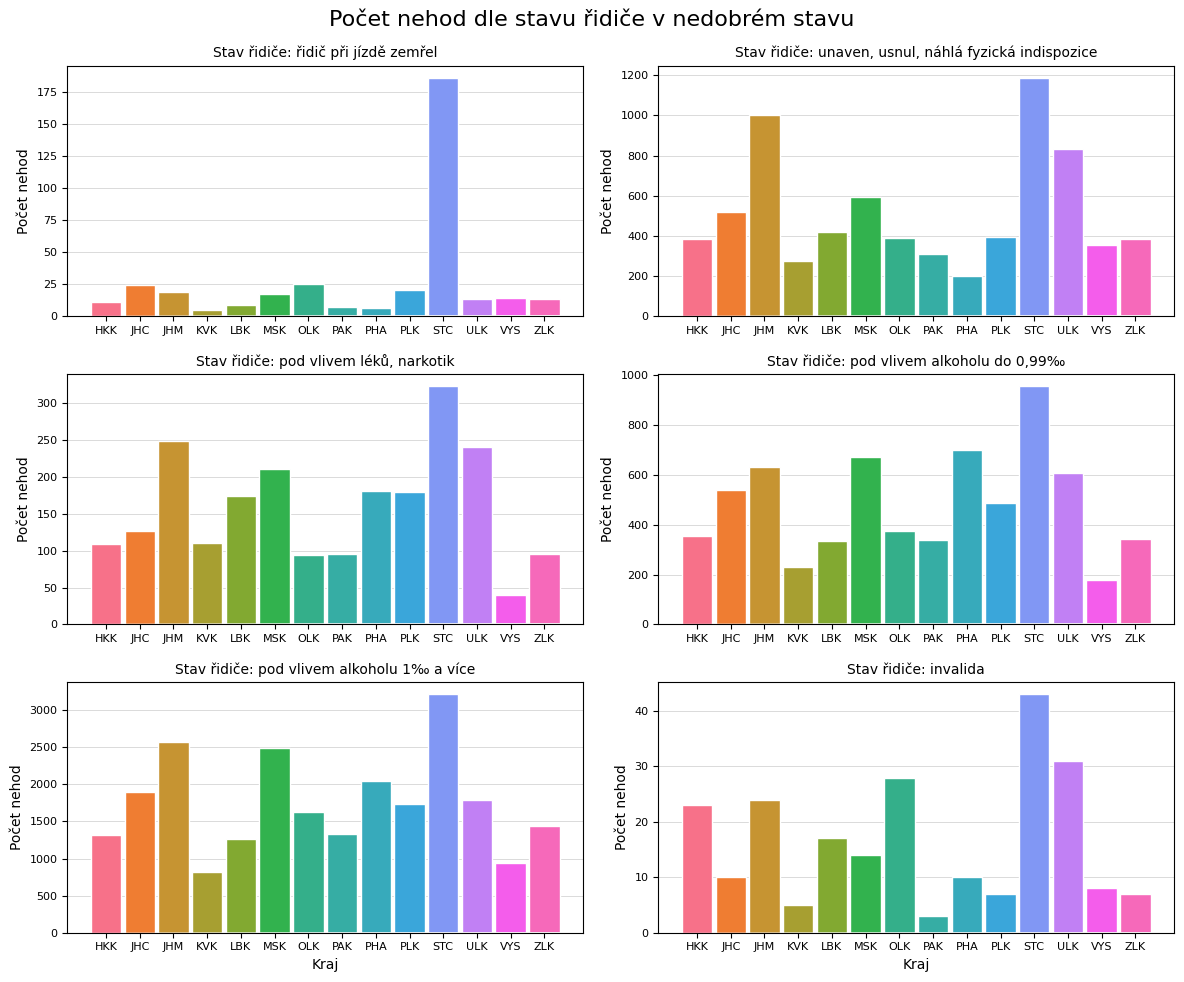

In [10]:
def _set_ax(
        df: pd.DataFrame, 
        ax_array: plt.Axes.axes, 
        searched_num: int, 
        ax_index: int,
        hline_indices: list[int], 
        title: str
    ):
    filtered_df = df[df["p57"] == searched_num] # alkohol pod 0.99
    filtered_df = filtered_df.sort_values(by="region")
    kwargs = _get_common_kwargs(filtered_df)
    histplot = sns.histplot(ax=ax_array[ax_index], **kwargs)
    histplot.set(xlabel=None)
    for row in hline_indices:
        histplot.axhline(y=row, color="black", zorder=0, alpha=0.2, linewidth=0.5)
    histplot.set_title(title, fontsize=10)


def _get_common_kwargs(df: pd.DataFrame) -> dict:
    return {"data": df, "stat": "count", "x": "region", "legend": False, "hue": "region", "alpha": 1, "shrink": 0.9, "palette": "husl"}

def _set_common_params(fig: plt.Figure, ax_array: plt.Axes.axes):
    fig.suptitle("Počet nehod dle stavu řidiče v nedobrém stavu", fontsize=16)
    for ax in ax_array:
        ax.set_ylabel("Počet nehod", fontsize=10)
        ax.tick_params(axis="both", labelsize=8)
    sns.set_theme(style="dark")


def plot_state(df: pd.DataFrame, fig_location: str = None, show_figure: bool = False):
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12,10))
    ax_array = axes.flatten()
    _set_common_params(fig, ax_array)
     
    _set_ax(df, ax_array, 8, 0, [25, 50, 75, 100, 125, 150, 175], "Stav řidiče: řidič při jízdě zemřel")
    _set_ax(df, ax_array, 2, 1, [200, 400, 600, 800, 1000, 1200], "Stav řidiče: unaven, usnul, náhlá fyzická indispozice")
    _set_ax(df, ax_array, 3, 2, [50, 100, 150, 200, 250, 300], "Stav řidiče: pod vlivem léků, narkotik")
    _set_ax(df, ax_array, 4, 3, [200, 400, 600, 800], "Stav řidiče: pod vlivem alkoholu do 0,99\u2030")
    _set_ax(df, ax_array, 5, 4, [500, 1000, 1500, 2000, 2500, 3000], "Stav řidiče: pod vlivem alkoholu 1\u2030 a více")
    _set_ax(df, ax_array, 7, 5, [10, 20, 30, 40], "Stav řidiče: invalida")

    for ax in ax_array[-2:]:
        ax.set_xlabel("Kraj", fontsize=10)

    plt.tight_layout()

    if fig_location:
        plt.savefig(fig_location)
    if show_figure:
        plt.show()

plot_state(df_truncated, show_figure=True)

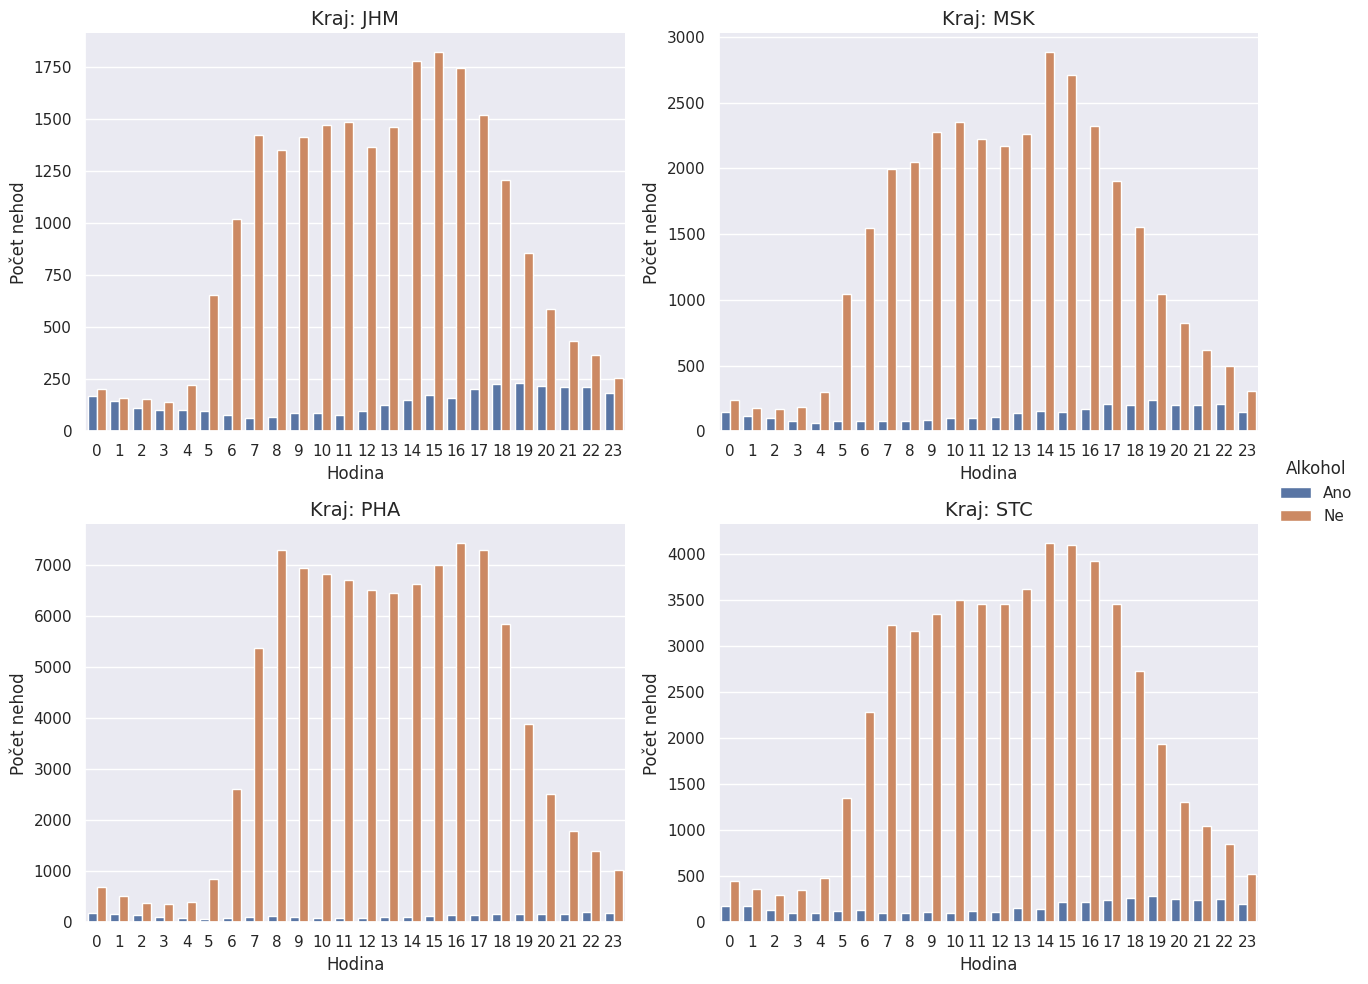

<Figure size 640x480 with 0 Axes>

In [11]:
def plot_alcohol(df: pd.DataFrame, fig_location: str = None,
                 show_figure: bool = False):
    df_filtered = df.copy()
    df_filtered["p2b"] = df["p2b"] // 100
    df_filtered = df_filtered[(0 <= df_filtered["p2b"]) & (df_filtered["p2b"] <= 24)]
    df_filtered = df_filtered[(df_filtered["region"] == "JHM") | (df_filtered["region"] == "PHA") | (df_filtered["region"] == "STC") | (df_filtered["region"] == "MSK")]

    df_filtered = df_filtered.dropna(subset=["p11"])
    df_filtered["Ano"] = (df_filtered["p11"] >= 3)
    df_filtered["Ne"] = (df_filtered["p11"] == 1) | (df_filtered["p11"] == 2) 
    df_grouped = df_filtered.groupby(["region", "p2b"]).agg({"Ano": "sum",
                                                             "Ne": "sum"})    
        
    df_melted = pd.melt(df_grouped.reset_index(), id_vars=["region", "p2b"], var_name="Alkohol", value_name="count")

    sns.set_theme("notebook")
    cp = sns.catplot(x="p2b", y="count", hue="Alkohol", col="region", data=df_melted,
                kind="bar", col_wrap=2, aspect=1.2, sharey=False, sharex=False)
    sns.move_legend(cp, "center right", bbox_to_anchor=(1.07,0.5))
    axs = cp.axes.flatten()
    names = ["JHM", "MSK", "PHA", "STC"]
    for ax, name in zip(axs, names):
        ax.set_title(f"Kraj: {name}", fontsize=14)
        ax.set_xlabel("Hodina")
        ax.set_ylabel("Počet nehod")

    plt.tight_layout()
    plt.show()
    plt.savefig("02_alcohol.png", bbox_inches="tight")

plot_alcohol(df_truncated)

TypeError: Legend.__init__() got an unexpected keyword argument 'ax'

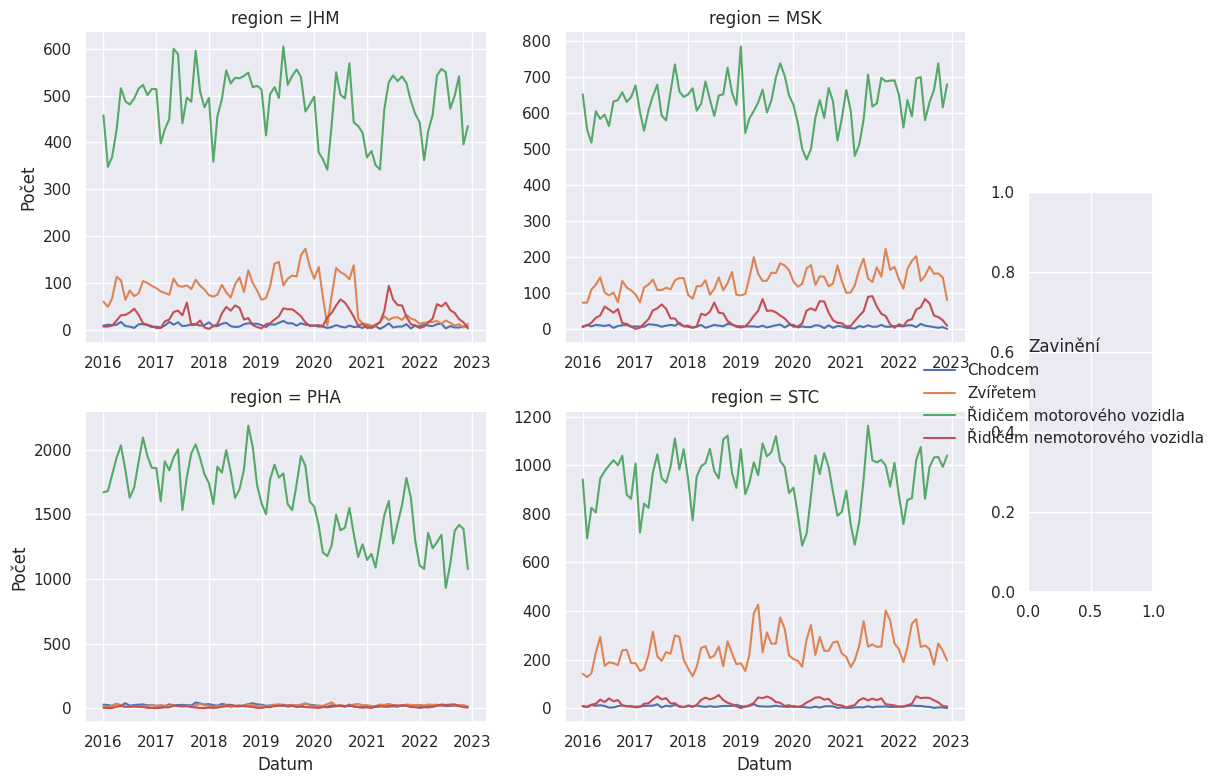

In [12]:
def plot_fault(df: pd.DataFrame, fig_location: str = None,
               show_figure: bool = False):
    df_filtered = df.copy()
    df_filtered = df_filtered[(df_filtered["p10"] == 1) | (df_filtered["p10"] == 2) | (df_filtered["p10"] == 3) | (df_filtered["p10"] == 4)]
    df_filtered = df_filtered[(df_filtered["region"] == "JHM") | (df_filtered["region"] == "PHA") | (df_filtered["region"] == "STC") | (df_filtered["region"] == "MSK")]
    df_filtered["p10"] = df_filtered["p10"].astype(str).map({"1": "Řidičem motorového vozidla","2": "Řidičem nemotorového vozidla", "3": "Chodcem", "4": "Zvířetem"})
    df_filtered.rename(columns={"p2a": "Datum", "p10": "Zavinění"}, inplace=True)
    df_filtered = df_filtered.loc[:, ["region", "Datum", "Zavinění"]]
    df_filtered["aux"] = df_filtered["Zavinění"]
    df_filtered = df_filtered.pivot_table(index=["region", "Datum"], values="aux", columns="Zavinění", aggfunc="count", fill_value=0)
    to_melt = ['Chodcem', 'Zvířetem', 'Řidičem motorového vozidla', "Řidičem nemotorového vozidla"]
    df_filtered = df_filtered.reset_index().melt(id_vars=["region", "Datum"], value_vars=to_melt, var_name="Zavinění", value_name="Počet")
    df_filtered = df_filtered.groupby(["region", "Zavinění"]).resample("MS", on="Datum").sum("Počet")

    rp = sns.relplot(data=df_filtered, x="Datum", y="Počet", col="region", hue="Zavinění", kind="line", height=4, aspect=1.2, col_wrap=2, facet_kws={"sharex": False, "sharey": False})
    rp.fig.subplots_adjust(right=0.8)  # Adjust the layout to make room for the legend
    sns.move_legend(rp, "center right", bbox_to_anchor=(1.25, 0.5))

    for ax, name in zip(rp.axes.flat, ["JHM", "MSK", "PHA", "STC"]):
        ax.set_title(f"Kraj: {name}")
        ax.set_xticks([f"20{x}" for x in range(16, 24)])
        ax.set_xticklabels([f"01/{x}" for x in range(16, 24)])
        ax.set_xlim(pd.to_datetime("1.1.2016"), pd.to_datetime("1.1.2023"))

    rp.axes.flat[0].set_ylabel("Počet nehod")
    rp.axes.flat[2].set_ylabel("Počet nehod")

    plt.tight_layout()
    plt.savefig("bruh.png", bbox_inches="tight")
    plt.show()
    return df_filtered

bruh = plot_fault(df_truncated)
bruh